# Tutorial sgRNA analysis

## Python Imports

In [1]:
import antenna_count_reads
import pandas as pd
import matplotlib.pyplot as plt

## Main Analysis

Specify the bam file to examine. This file must have been pre-processed with antenna_tag_reads and must be indexed

In [2]:
counted_bam_path = 'testing/example1_custom/antenna_tagged.bam'

Examine the reads in the file and collect TRS alignement scores and relevant metadata in a pandas array

In [3]:
sgRNA_scores = antenna_count_reads.load_sgRNA_scores(counted_bam_path)

100%|██████████| 726622/726622 [00:04<00:00, 167525.30it/s]


Examine the distribution of scores in all possible configurations. Specifically:
    
- Forward / Reverse: orientation of read wrt reference
- R1/R2: Whether this read is read 1 or read 2
- 5'/3': If the TRS was identified in the 3' or 5' flanking region of the read
- TRS/RC TRS/R TRS/C TRS: Orientation of sequences that was found

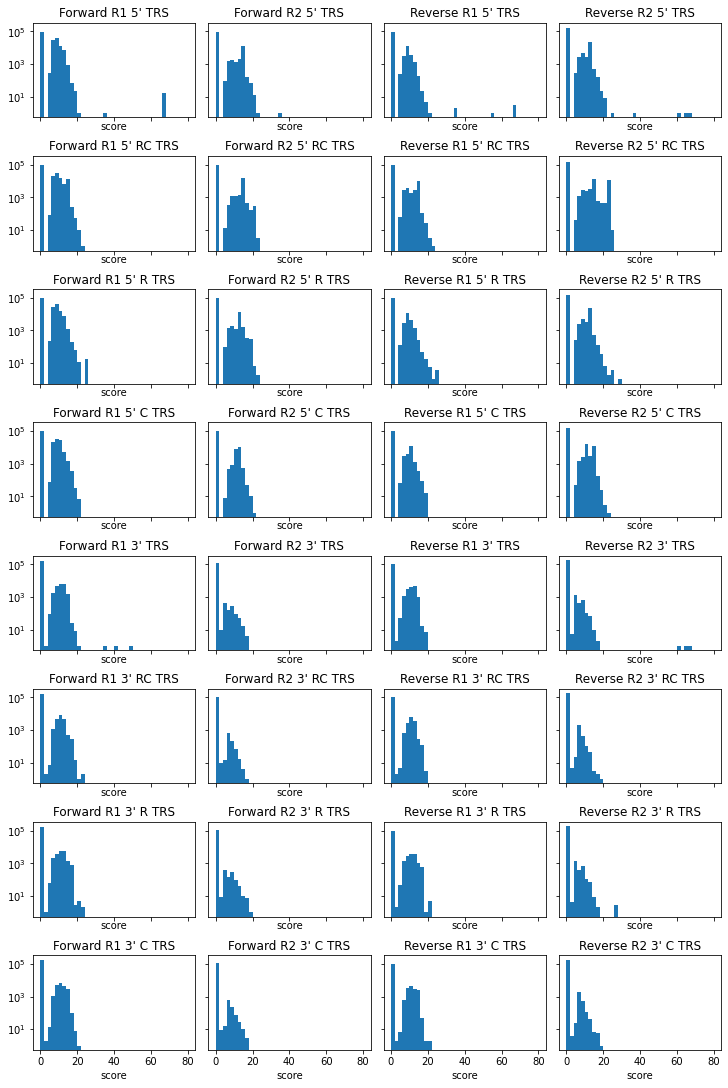

In [13]:
fig1 = antenna_count_reads.plot_read_score_dist(sgRNA_scores,n_bins=40)

### Ideas for automating cutoff selection
- Remove 0s
- Convert to z-scores
- Report fraction of reads that exceed 2 sds
- Report mean score of all reads above

## Merge information from read pairs

In [5]:
merged_read_information = antenna_count_reads.merge_read_information(sgRNA_scores)

<AxesSubplot:xlabel='p5_o_score_r1', ylabel='p5_o_score_r2'>

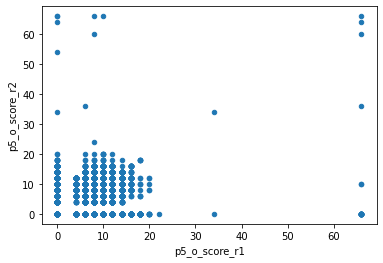

In [6]:
merged_read_information.plot.scatter(x='p5_o_score_r1',y='p5_o_score_r2')

In [14]:
import numpy as np

In [ ]:
merged_read_information.plot.scatter(x='p5_o_score_r1',y='p5_o_score_r2')

Notes:
- 2d histogram matplot hist2d
- add alpha + jitter
- contour on log scale -- pre-bin this
- report proportion of reads in each quadrant
- https://numpy.org/doc/stable/reference/generated/numpy.histogram2d.html
- https://plotly.com/python/2d-histogram-contour/

In [7]:
cutoff = 30

In [8]:
# Add histogram (over/under axis)

In [9]:
def annotate_merged_read_information(merge_sg_read_info, cutoff, sgRNA_bam_tag_name="TO"):
    """Count sgRNAs stratifying by orientation"""

    columns_to_count = [
        "p5_o_score_r1",
        "p3_o_score_r1",
        "p5_o_score_r2",
        "p3_o_score_r2",
    ]
    
    TRS_found_column = []

    for read_pair in merge_sg_read_info.itertuples():
        count_read_pair = False

        for cc in columns_to_count:
            if getattr(read_pair, cc) > cutoff:
                count_read_pair = True
                continue  # This should only jump out of inner
        
        TRS_found_column.append(count_read_pair)
        
    
    merge_sg_read_info['TRS_found'] = TRS_found_column
    
    return merge_sg_read_info
        


In [10]:
annot_read_info = annotate_merged_read_information(merged_read_information, 50)

TypeError: cannot unpack non-iterable AxesSubplot object

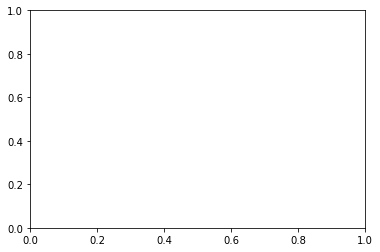

In [11]:
fig, ax = plt.subplot()

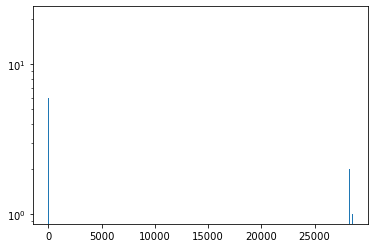

In [17]:
plt.hist(annot_read_info[annot_read_info['TRS_found']]['reference_start_r1'],log=True,bins=1000);

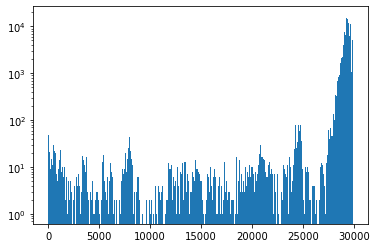

In [18]:
plt.hist(annot_read_info[annot_read_info['TRS_found'] == False]['reference_start_r1'],log=True,bins=1000);

In [26]:
merged_read_information

,reference_start_r1,reference_end_r1,reference_name_r1,is_read1_r1,reverse_r1,p5_o_score_r1,p5_rc_score_r1,p5_r_score_r1,p5_c_score_r1,p3_o_score_r1,...,reverse_r2,p5_o_score_r2,p5_rc_score_r2,p5_r_score_r2,p5_c_score_r2,p3_o_score_r2,p3_rc_score_r2,p3_r_score_r2,p3_c_score_r2,TRS_found
query_name,,,,,,,,,,,,,,,,,,,,,
H57H2AFX3:1:11101:10005:8932,28978,29106,MN908947.3,True,False,6,10,12,8,0,...,True,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,False
H57H2AFX3:1:11101:10009:18342,29633,29753,MN908947.3,True,True,14,14,12,10,0,...,False,0.0,0.0,0.0,0.0,8.0,8.0,8.0,8.0,False
H57H2AFX3:1:11101:10011:10841,29375,29524,MN908947.3,True,True,0,0,0,0,0,...,False,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,False
H57H2AFX3:1:11101:10011:16750,29110,29237,MN908947.3,True,False,6,14,6,10,0,...,True,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,False
H57H2AFX3:1:11101:10018:4396,26821,26926,MN908947.3,True,False,12,14,12,10,0,...,True,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
H57H2AFX3:1:21312:9968:12102,29613,29762,MN908947.3,True,True,0,0,0,0,0,...,False,8.0,14.0,8.0,10.0,0.0,0.0,0.0,0.0,False
H57H2AFX3:1:21312:9969:12834,29260,29409,MN908947.3,True,False,0,0,0,0,0,...,True,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,False
H57H2AFX3:1:21312:9983:19736,29337,29486,MN908947.3,True,False,0,0,0,0,0,...,True,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,False


In [23]:
trs_intervals = antenna_count_reads.count_sgRNA(merged_read_information, '../../data/orf_start.bed', cutoff)

In [24]:
intervals_counts = antenna_count_reads.summarize_trs_intervals(trs_intervals)

In [25]:
intervals_counts

,name,ref,start,end,sg_count,non_sg_counts
0,ORF1a,MN908947.3,20,40,1,0
1,S,MN908947.3,21532,21572,0,10
2,ORF3a,MN908947.3,25361,25401,0,11
3,E,MN908947.3,26213,26253,0,4
4,M,MN908947.3,26449,26489,1,1
5,ORF6,MN908947.3,27017,27057,0,9
6,ORF7a,MN908947.3,27364,27404,0,45
7,ORF8,MN908947.3,27864,27904,0,85
8,N,MN908947.3,28235,28275,22,333
9,N*,MN908947.3,28878,28898,0,2259


In [ ]:
# Make jupyter notebook and run 
# nbconvert to generate report 